<a href="https://colab.research.google.com/github/ChantelMagaia/LearningFromData/blob/main/Magaia_CC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##216001407 CC MAGAIA
### Learning From Data
### Assignment 3

In [ ]:
#Load the librarys
import pandas  as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.stats import kurtosis

import warnings
warnings.filterwarnings('ignore')
cmap=sns.color_palette('Blues_r')

#Importing the data
df = pd.read_csv('BreastCancer.csv')

## About The Dataset

This dataset of breast cancer patients was obtained from the 2017 November update of the SEER Program of the NCI, which provides information on population-based cancer statistics. The dataset involved female patients with infiltrating duct and lobular carcinoma breast cancer (SEER primary cites recode NOS histology codes 8522/3) diagnosed in 2006-2010. Patients with unknown tumour size, examined regional LNs, positive regional LNs, and patients whose survival months were less than 1 month were excluded; thus, 4024 patients were ultimately included.


## Data Overview



In [ ]:
# Remove any whitespace from column names
df.columns = df.columns.str.strip()

In [ ]:
#Descriptive Statistics

round(df.describe(),2)

,Age,Grade,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.00,4024.00,4024.00,4024.00,4024.00,4024.00
mean,53.97,2.15,30.47,14.36,4.16,71.30
std,8.96,0.64,21.12,8.10,5.11,22.92
min,30.00,1.00,1.00,1.00,1.00,1.00
25%,47.00,2.00,16.00,9.00,1.00,56.00
50%,54.00,2.00,25.00,14.00,2.00,73.00
75%,61.00,3.00,38.00,19.00,5.00,90.00
max,69.00,4.00,140.00,61.00,46.00,107.00


In [ ]:
#Looking the data

df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [ ]:
# check data size and missings values,type of data 

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   int64 
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

There is no missing data on any column so there is no need for filling missing data.

In [ ]:
#Looking unique values

print(df.nunique())

Age                        40
Race                        3
Marital Status              5
T Stage                     4
N Stage                     3
6th Stage                   5
differentiate               4
Grade                       4
A Stage                     2
Tumor Size                110
Estrogen Status             2
Progesterone Status         2
Regional Node Examined     54
Reginol Node Positive      38
Survival Months           107
Status                      2
dtype: int64


# Visual Aesthetics

* Bar Chart

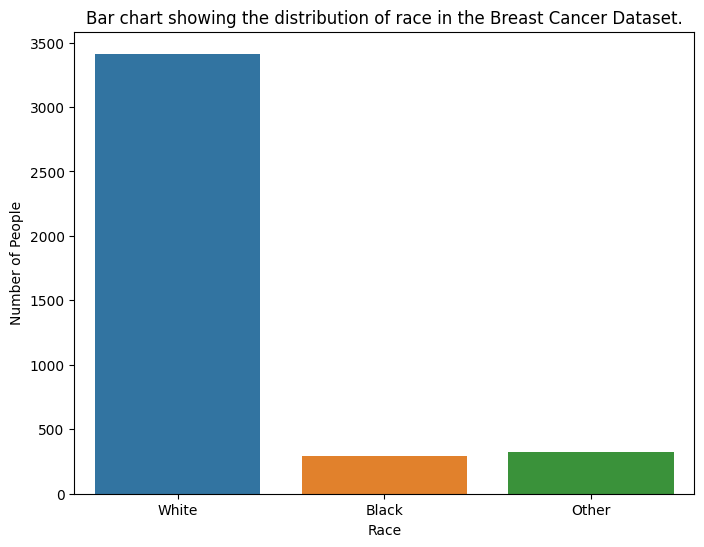

In [ ]:
# Bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='Race',data = df)

plt.title('Bar chart showing the distribution of race in the Breast Cancer Dataset.')
plt.xlabel('Race')
plt.ylabel('Number of People')

plt.show()

* Pie Chart

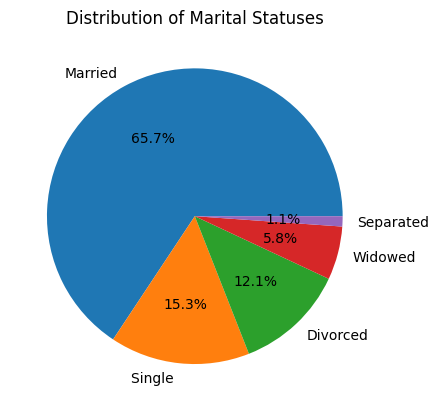

In [ ]:
# Pie chart
counts = df['Marital Status'].value_counts()

plt.pie(counts, labels=counts.index, autopct='%1.1f%%')

plt.title('Distribution of Marital Statuses')

plt.show()

* Histogram

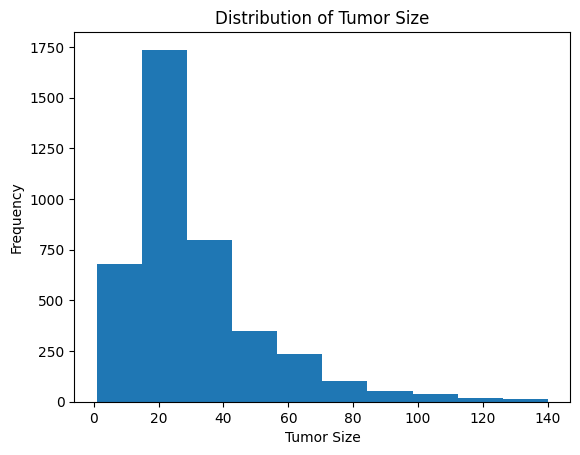

In [ ]:
# Histogram of Tumor Size 

plt.hist(df['Tumor Size'], bins=10)

plt.title('Distribution of Tumor Size')
plt.xlabel('Tumor Size')
plt.ylabel('Frequency')

plt.show()

* Violin Plot

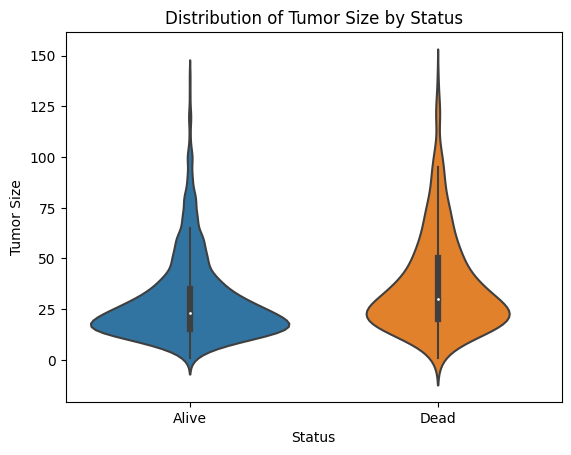

In [ ]:
# Violin plot of Tumor Size by Status

sns.violinplot(x='Status', y='Tumor Size', data=df)

plt.title('Distribution of Tumor Size by Status')
plt.xlabel('Status')
plt.ylabel('Tumor Size')

plt.show()

* Box Plot

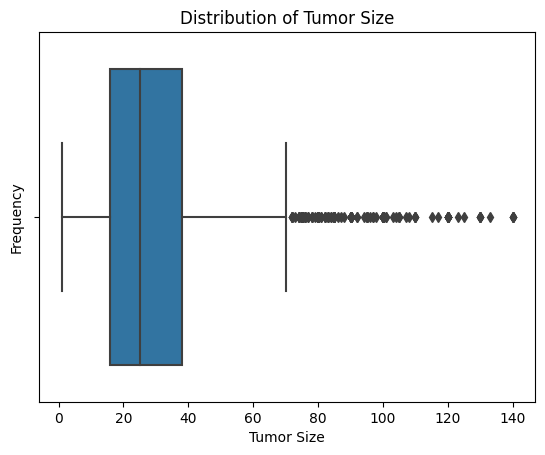

In [ ]:
# Box plot of Tumor Size

sns.boxplot(x=df['Tumor Size'])

plt.title('Distribution of Tumor Size')
plt.xlabel('Tumor Size')
plt.ylabel('Frequency')

plt.show()

* Scatter Plot

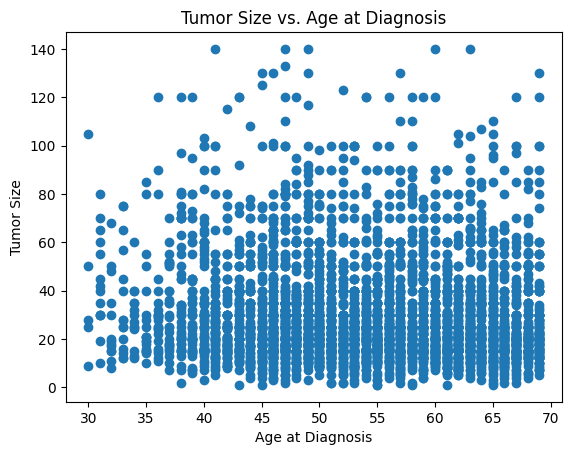

In [ ]:
# Scatter plot of Tumor Size vs. Age at Diagnosis

plt.scatter(x=df['Age'], y=df['Tumor Size'])

plt.title('Tumor Size vs. Age at Diagnosis')
plt.xlabel('Age at Diagnosis')
plt.ylabel('Tumor Size')

plt.show()

* Correlation Metrix and Heatmap

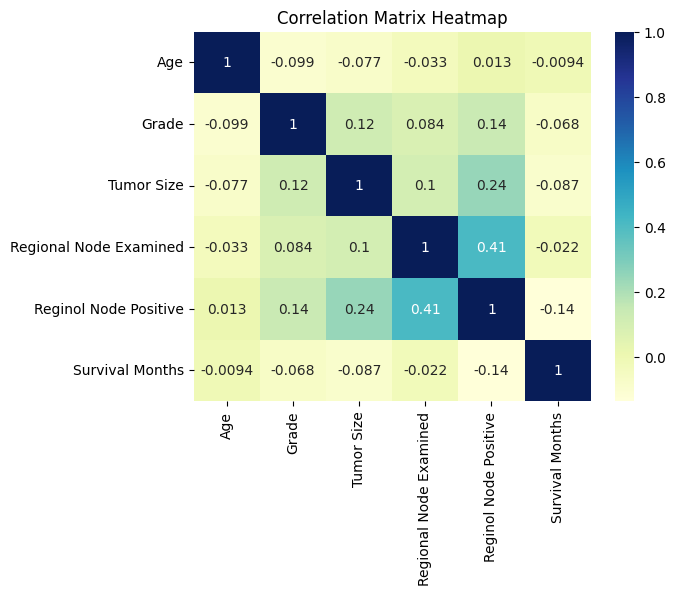

In [ ]:
# Correlation matrix
corr_matrix = df.corr()

# Heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')

plt.title('Correlation Matrix Heatmap')

plt.show()

# Data Preprocessing

Descriptive statistics can only be calculated for numerical values. The Following code converts the charactor or string columns to numeric.

### The converted Data

*   Race
*   Marital Status
*   T Stage
*   N Stage
*   6th Stage
*   Diffirentiate
*   A Stage
*   Estrogen Status
*   Progestorone Status
*   Status





In [ ]:
# Race 
df.loc[df.loc[:, 'Race']=='White', 'Race'] = 0
df.loc[df.loc[:, 'Race']=='Black', 'Race'] = 1
df.loc[df.loc[:, 'Race']=='Other', 'Race'] = 2

# Marital Status 
df.loc[df.loc[:, 'Marital Status']=='Married', 'Marital Status'] = 0
df.loc[df.loc[:, 'Marital Status']=='Divorced', 'Marital Status'] = 1
df.loc[df.loc[:, 'Marital Status']=='Single ', 'Marital Status'] = 2
df.loc[df.loc[:, 'Marital Status']=='Widowed', 'Marital Status'] = 3
df.loc[df.loc[:, 'Marital Status']=='Separated', 'Marital Status'] = 4

# T Stage
df.loc[df.loc[:, 'T Stage']=='T1', 'T Stage'] = 0
df.loc[df.loc[:, 'T Stage']=='T2', 'T Stage'] = 1
df.loc[df.loc[:, 'T Stage']=='T3', 'T Stage'] = 2
df.loc[df.loc[:, 'T Stage']=='T4', 'T Stage'] = 3

# N Stage
df.loc[df.loc[:, 'N Stage']=='N1', 'N Stage'] = 0
df.loc[df.loc[:, 'N Stage']=='N2', 'N Stage'] = 1
df.loc[df.loc[:, 'N Stage']=='N3', 'N Stage'] = 2

# 6th Stage
df.loc[df.loc[:, '6th Stage']=='IIA', '6th Stage'] = 0
df.loc[df.loc[:, '6th Stage']=='IIIA', '6th Stage'] = 1
df.loc[df.loc[:, '6th Stage']=='IIIC', '6th Stage'] = 2
df.loc[df.loc[:, '6th Stage']=='IIB', '6th Stage'] = 3
df.loc[df.loc[:, '6th Stage']=='IIIB', '6th Stage'] = 4

# differentiate
df.loc[df.loc[:, 'differentiate']=='Poorly differentiated', 'differentiate'] = 0
df.loc[df.loc[:, 'differentiate']=='Moderately differentiated', 'differentiate'] = 1
df.loc[df.loc[:, 'differentiate']=='Well differentiated', 'differentiate'] = 2
df.loc[df.loc[:, 'differentiate']=='Undifferentiated', 'differentiate'] = 3

#A Stage
df.loc[df.loc[:, 'A Stage']=='Regional', 'A Stage'] = 0
df.loc[df.loc[:, 'A Stage']=='Distant', 'A Stage'] = 1

#Estrogen Status
df.loc[df.loc[:, 'Estrogen Status']=='Positive', 'Estrogen Status'] = 0
df.loc[df.loc[:, 'Estrogen Status']=='Negetive', 'Estrogen Status'] = 1

#Progesterone Status
df.loc[df.loc[:, 'Progesterone Status']=='Positive', 'Progesterone Status'] = 0
df.loc[df.loc[:, 'Progesterone Status']=='Negetive', 'Progesterone Status'] = 1

#Status
df.loc[df.loc[:, 'Status']=='Alive', 'Status'] = 0
df.loc[df.loc[:, 'Status']=='Dead', 'Status'] = 1


In [ ]:
df.head(5)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,0,0,0,0,0,0,3,0,4,0,0,24,1,60,0
1,50,0,0,1,1,1,1,2,0,35,0,0,14,5,62,0
2,58,0,1,2,2,2,1,2,0,63,0,0,14,7,75,0
3,58,0,0,0,0,0,0,3,0,18,0,0,2,1,84,0
4,47,0,0,1,0,3,0,3,0,41,0,0,3,1,50,0


Now every column is converted to numeric

# Descriptive Statistics

* Mean 

>The average of a set of numbers.


================================= MEAN ==================================

Age                       53.972167
Race                       0.231362
Marital Status             0.646372
T Stage                    0.784791
N Stage                    0.438370
6th Stage                  1.404573
differentiate              0.868290
Grade                      2.150596
A Stage                    0.022863
Tumor Size                30.473658
Regional Node Examined    14.357107
Reginol Node Positive      4.158052
Survival Months           71.297962
Status                     0.153082
dtype: float64




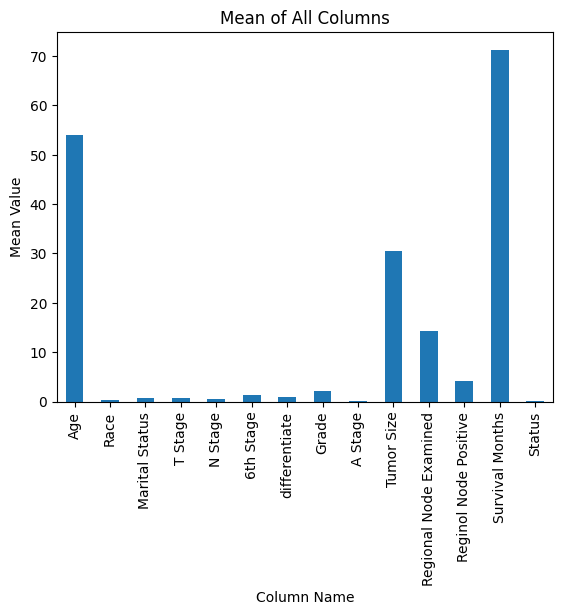

In [ ]:
means = df.mean()

print('\n================================= MEAN ==================================\n')
print(means)
print('\n=========================================================================\n')

means.plot(kind='bar')

plt.xlabel('Column Name')
plt.ylabel('Mean Value')
plt.title('Mean of All Columns')
plt.show()

* Median
>The middle value in a set of numbers when they are arranged in order.


================================ MEDIANS =================================

Age                       54.0
Race                       0.0
Marital Status             0.0
T Stage                    1.0
N Stage                    0.0
6th Stage                  1.0
differentiate              1.0
Grade                      2.0
A Stage                    0.0
Tumor Size                25.0
Regional Node Examined    14.0
Reginol Node Positive      2.0
Survival Months           73.0
Status                     0.0
dtype: float64




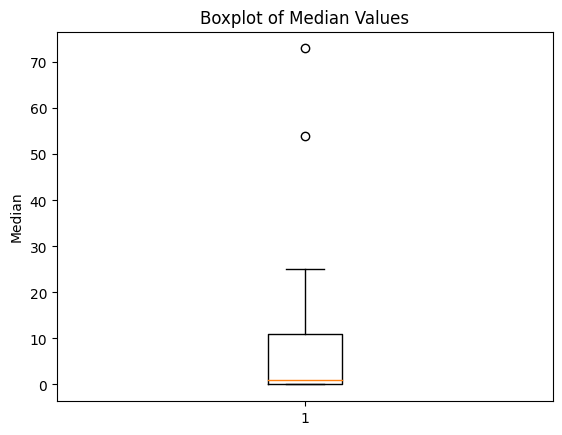

In [ ]:
medians = df.median()

print('\n================================ MEDIANS =================================\n')
print(medians)
print('\n=========================================================================\n')

plt.boxplot(medians)
plt.title('Boxplot of Median Values')
plt.ylabel('Median')
plt.show()

* Mode
>The value that appears most frequently in a set of numbers.

In [ ]:
# modes = df.mode()

print('\n================================= MODE ==================================\n')

print(f"Age: {df['Age'].mode()[0]}")
print(f"Race: {df['Race'].mode()[0]}")
print(f"Marital Status: {df['Marital Status'].mode()[0]}")
print(f"T Stage: {df['T Stage'].mode()[0]}")
print(f"N Stage: {df['N Stage'].mode()[0]}")
print(f"6th Stage: {df['6th Stage'].mode()[0]}")
print(f"differentiate: {df['differentiate'].mode()[0]}")
print(f"Grade: {df['Grade'].mode()[0]}")
print(f"A Stage: {df['A Stage'].mode()[0]}")
print(f"Tumor Size: {df['Tumor Size'].mode()[0]}")
print(f"Regional Node Examined: {df['Regional Node Examined'].mode()[0]}")
print(f"Reginol Node Positive: {df['Reginol Node Positive'].mode()[0]}")
print(f"Survival Months: {df['Survival Months'].mode()[0]}")
print(f"Status: {df['Status'].mode()[0]}")

print('\n=========================================================================\n')





================================= MODE ==================================

Age: 46
Race: 0
Marital Status: 0
T Stage: 1
N Stage: 0
6th Stage: 0
differentiate: 1
Grade: 2
A Stage: 0
Tumor Size: 15
Regional Node Examined: 13
Reginol Node Positive: 1
Survival Months: 69
Status: 0




* Range
> The difference between the highest and lowest values in a set of numbers.

In [ ]:

range_df = df.max() - df.min()

print('\n================================= RANGE =================================\n')
print(range_df)
print('\n=========================================================================\n')


================================= RANGE =================================

Age                        39
Race                        2
Marital Status              4
T Stage                     3
N Stage                     2
6th Stage                   4
differentiate               3
Grade                       3
A Stage                     1
Tumor Size                139
Regional Node Examined     60
Reginol Node Positive      45
Survival Months           106
Status                      1
dtype: object




* Variance
> The average of the squared differences from the mean.

In [ ]:
variance_df = df.var()

print('\n================================ VARIANCE ================================\n')
print(variance_df)
print('\n=========================================================================\n')


================================ VARIANCE ================================

Age                        80.337778
Race                        0.336963
Marital Status              1.019087
T Stage                     0.586038
N Stage                     0.480914
6th Stage                   1.551418
differentiate               0.412676
Grade                       0.407342
A Stage                     0.022346
Tumor Size                446.041563
Regional Node Examined     65.604732
Reginol Node Positive      26.105265
Survival Months           525.391932
Status                      0.129680
dtype: float64




* Standard deviation
>  The square root of the variance.

In [ ]:
std = df.std()

print('\n========================== STANDARD DEVIATION ============================\n')
print(std)
print('\n=========================================================================\n')


========================== STANDARD DEVIATION ============================

Age                        8.963134
Race                       0.580485
Marital Status             1.009498
T Stage                    0.765531
N Stage                    0.693479
6th Stage                  1.245559
differentiate              0.642398
Grade                      0.638234
A Stage                    0.149485
Tumor Size                21.119696
Regional Node Examined     8.099675
Reginol Node Positive      5.109331
Survival Months           22.921430
Status                     0.360111
dtype: float64




* Interquartile range (IQR)
> The difference between the first and third quartiles of the data.

In [ ]:
iqr = df.describe().loc['75%'] - df.describe().loc['25%']

print('\n========================= INTERQUARTILE RANGE ===========================\n')
print(iqr)
print('\n=========================================================================\n')


========================= INTERQUARTILE RANGE ===========================

Age                       14.0
Grade                      1.0
Tumor Size                22.0
Regional Node Examined    10.0
Reginol Node Positive      4.0
Survival Months           34.0
dtype: float64




* Quartiles (Q1 Q2 Q3)
> Are the three points that divide a dataset into four equal groups, with each group containing 25% of the data. The first quartile (Q1) represents the 25th percentile of the data, the second quartile (Q2) represents the 50th percentile of the data (also known as the median), and the third quartile (Q3) represents the 75th percentile of the data.


In [ ]:
q1 = df.quantile(0.25)
q2 = df.quantile(0.50)  #Also Known as median
q3 = df.quantile(q=0.75)

print('\n============================ FIRST QUARTILE =============================\n')
print(q1)
print('\n=========================================================================\n')

print('\n============================ SECOND QUARTILE ============================\n')
print(q1)
print('\n=========================================================================\n')

print('\n============================ THIRD QUARTILE =============================\n')
print(q1)
print('\n=========================================================================\n')


============================ FIRST QUARTILE =============================

Age                       47.0
Grade                      2.0
Tumor Size                16.0
Regional Node Examined     9.0
Reginol Node Positive      1.0
Survival Months           56.0
Name: 0.25, dtype: float64



============================ SECOND QUARTILE ============================

Age                       47.0
Grade                      2.0
Tumor Size                16.0
Regional Node Examined     9.0
Reginol Node Positive      1.0
Survival Months           56.0
Name: 0.25, dtype: float64



============================ THIRD QUARTILE =============================

Age                       47.0
Grade                      2.0
Tumor Size                16.0
Regional Node Examined     9.0
Reginol Node Positive      1.0
Survival Months           56.0
Name: 0.25, dtype: float64




* Minimum And Maximum

In [ ]:
max_values = df.max()
min_values = df.min()

print('\n============================ MINIMUM =============================\n')
print(min_values)
print('\n==================================================================\n')

print('\n============================ MAXIMUM ============================\n')
print(max_values)
print('\n=================================================================\n')


============================ MINIMUM =============================

Age                       30
Race                       0
Marital Status             0
T Stage                    0
N Stage                    0
6th Stage                  0
differentiate              0
Grade                      1
A Stage                    0
Tumor Size                 1
Regional Node Examined     1
Reginol Node Positive      1
Survival Months            1
Status                     0
dtype: object



============================ MAXIMUM ============================

Age                        69
Race                        2
Marital Status              4
T Stage                     3
N Stage                     2
6th Stage                   4
differentiate               3
Grade                       4
A Stage                     1
Tumor Size                140
Regional Node Examined     61
Reginol Node Positive      46
Survival Months           107
Status                      1
dtype: object




* Midrange
> is a simple measure of central tendency which is the arithmetic mean of the minimum and maximum values in a data set.

In [ ]:
midrange = (df.max() + df.min()) / 2

print('\n============================ MIDRANGE =============================\n')
print(midrange)
print('\n===================================================================\n')


============================ MIDRANGE =============================

Age                       49.5
Race                       1.0
Marital Status             2.0
T Stage                    1.5
N Stage                    1.0
6th Stage                  2.0
differentiate              1.5
Grade                      2.5
A Stage                    0.5
Tumor Size                70.5
Regional Node Examined    31.0
Reginol Node Positive     23.5
Survival Months           54.0
Status                     0.5
dtype: object




# More Desciptive Statistics


In [ ]:
from scipy.stats import gmean

* Geometric Mean
> A measure of central tendency that is calculated as the n-th root of the product of n numbers, where n is the number of observations

In [ ]:
selected_cols = ['Age','Grade','Tumor Size','Regional Node Examined','Reginol Node Positive','Survival Months']

geometric_means = [gmean(df[col][df[col] > 0]) for col in selected_cols]

# create a new dataframe to display the results
gmeans = pd.DataFrame({'Geometric Mean': geometric_means}, index=selected_cols)


print('\n========================= GEOMETRIC MEANS ==========================\n')
print(gmeans)
print('\n===================================================================\n')


========================= GEOMETRIC MEANS ==========================

                        Geometric Mean
Age                          53.188650
Grade                         2.043845
Tumor Size                   24.703160
Regional Node Examined       11.602019
Reginol Node Positive         2.530530
Survival Months              65.623275




* Skewness
> A measure of the degree of asymmetry of a probability distribution.



============================ SKEWNESS =============================

Age                      -0.220373
Race                      2.365193
Marital Status            1.352380
T Stage                   0.725221
N Stage                   1.277128
6th Stage                 0.279827
differentiate             0.233763
Grade                    -0.032628
A Stage                   6.386935
Tumor Size                1.739750
Regional Node Examined    0.829274
Reginol Node Positive     2.702536
Survival Months          -0.589998
Status                    1.927690
dtype: float64




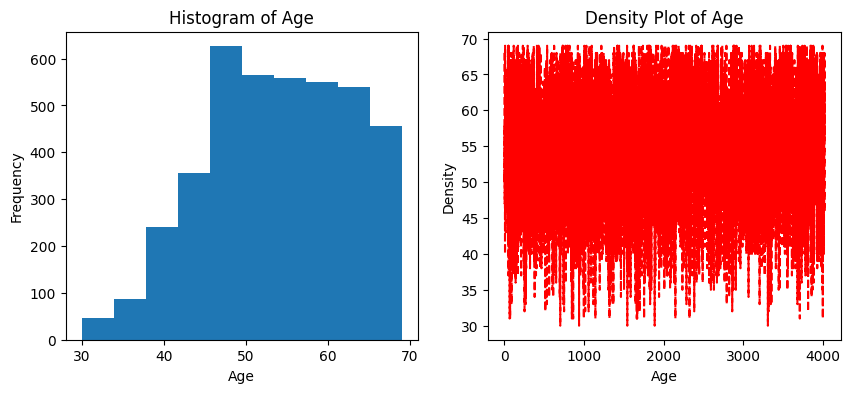

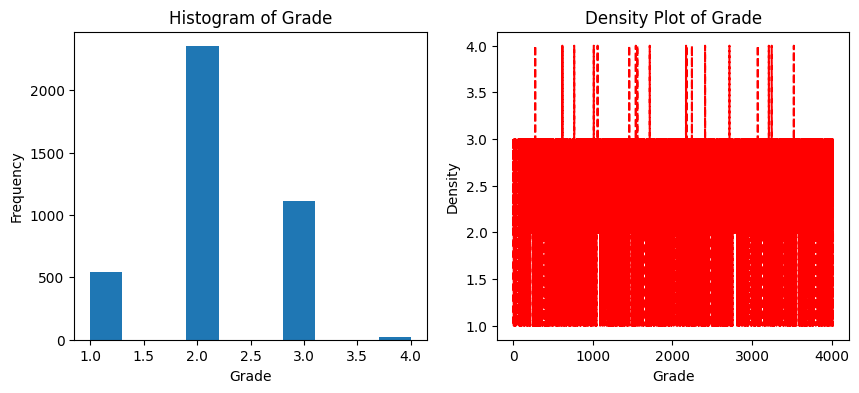

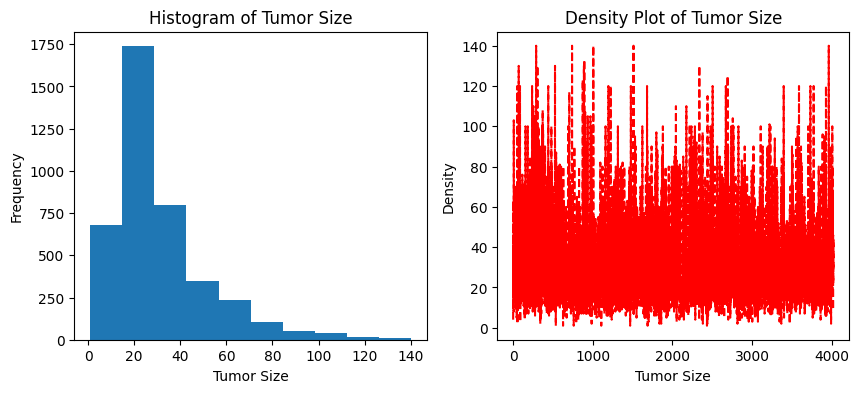

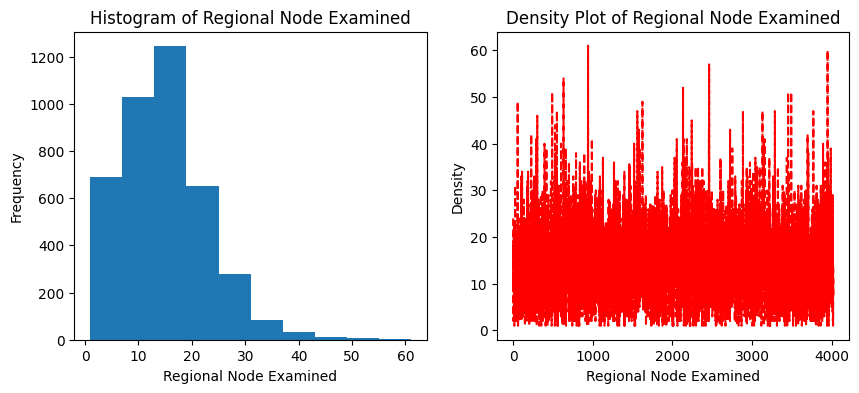

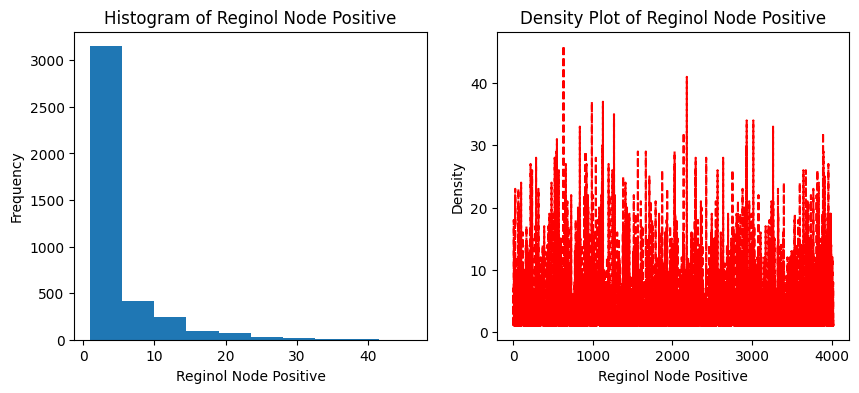

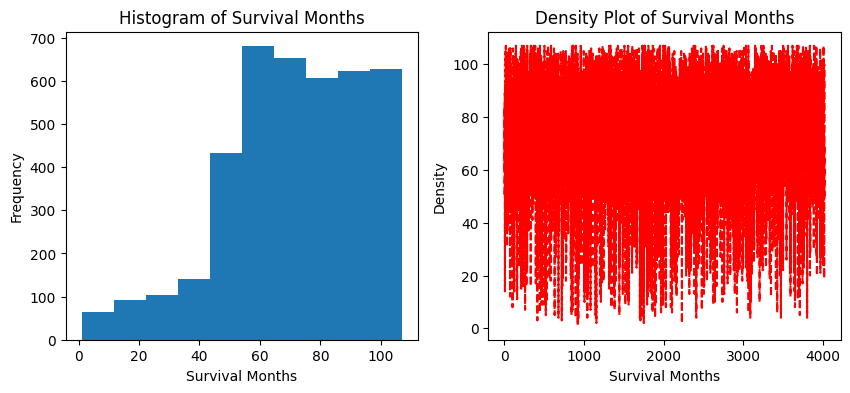

In [ ]:
skewness = df.skew()

print('\n============================ SKEWNESS =============================\n')
print(skewness)
print('\n===================================================================\n')

for col in selected_cols:
    col_data = pd.to_numeric(df[col], errors='coerce').dropna()

    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    axs[0].hist(df[col], bins=10)
    axs[0].set_title(f'Histogram of {col}')
    axs[0].set_xlabel(col)
    axs[0].set_ylabel('Frequency')
    axs[1].plot(df[col], 'r--')
    axs[1].set_title(f'Density Plot of {col}')
    axs[1].set_xlabel(col)
    axs[1].set_ylabel('Density')
    plt.show()

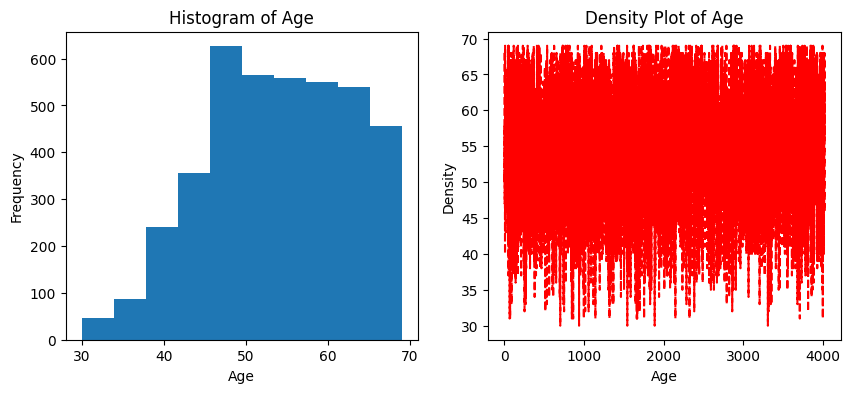

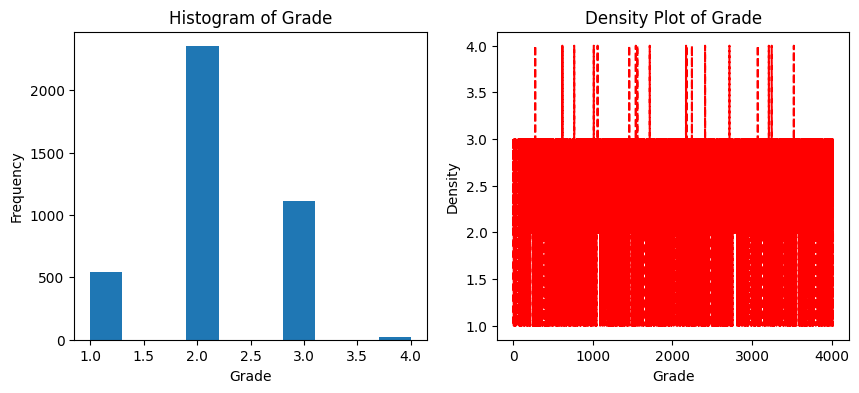

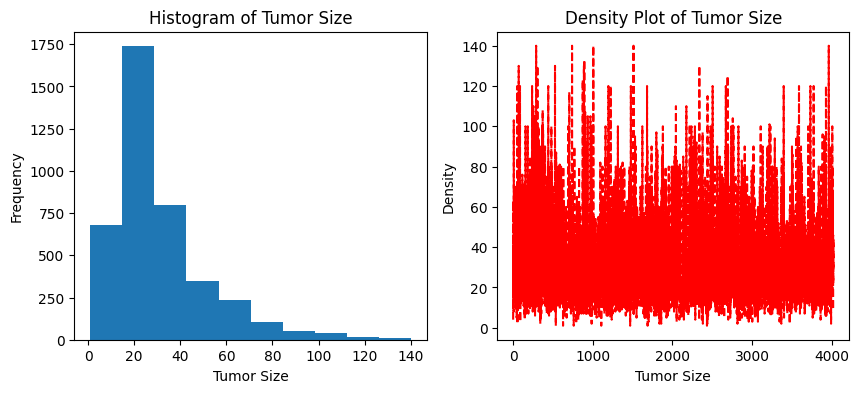

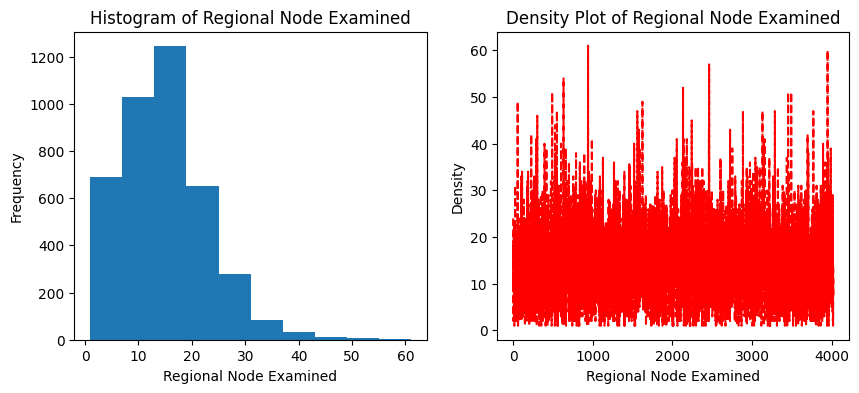

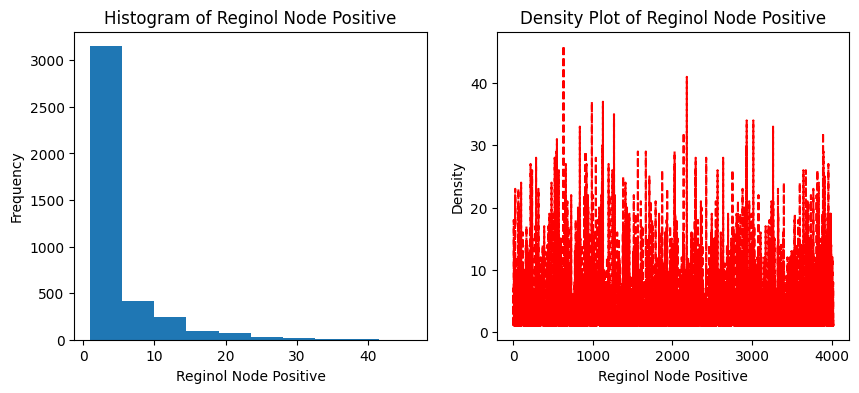

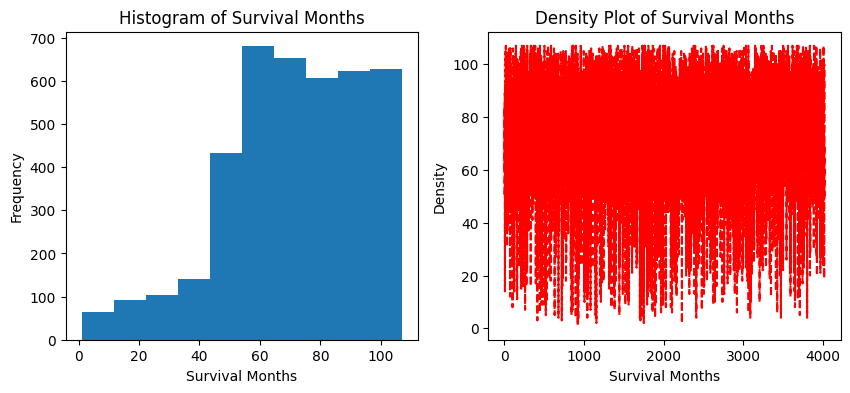

* Sum of Square
> A statistical calculation used to describe the variability of a set of data points


In [ ]:
ssq = np.sum((df - np.mean(df))**2)

print('\n========================== SUM OF SQUARE ===========================\n')
print(ssq)
print('\n===================================================================\n')


========================== SUM OF SQUARE ===========================

6th Stage                    6241.355865
A Stage                         89.89662
Age                        323198.882704
Estrogen Status                        0
Grade                        1638.738569
Marital Status               4099.787028
N Stage                      1934.715706
Progesterone Status                    0
Race                         1355.602137
Reginol Node Positive      105021.479125
Regional Node Examined      263927.83673
Status                        521.701789
Survival Months            2113651.74329
T Stage                      2357.629225
Tumor Size                1794425.207753
differentiate                1660.193837
dtype: object




Kurtosis
>A statistical measure that describes the shape of a distribution's tails in relation to its overall shape (such as whether it is tall and thin or short and wide)

In [ ]:
kurtosis_values = [kurtosis(df[col]) for col in selected_cols]


kur = pd.DataFrame({'Kurtosis': kurtosis_values}, index=selected_cols)

print('\n============================ KURTOSIS =============================\n')
print(kur)
print('\n===================================================================\n')

                        Kurtosis
Age                    -0.755640
Grade                  -0.372514
Tumor Size              3.628203
Regional Node Examined  1.645783
Reginol Node Positive   8.968619
Survival Months         0.018462


# Reflection

What i learned

## Rubric

* The visual aesthetics of the Notebook (Markdown and Graphs) *(30%)* **Done**
* Complexity of the data (cleaning it, missing values, ….) *(10%)* **Done**
* Usage of descriptive statistics *(30%)* **Done**
* Coverage of some descriptive statistics not covered in class *(10%)*  **Done**
* Use of Github (Show the github link) *(10%)* **Done**
* Reflections on your learnings between this assignment and the previous one. What was different between Python and Excel? When will you use either of them?  If you could do this assignment over what would you do differently? What are the gaps in your programming or stats knowledge? *(350 words) (10%)* **To DO**